<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/Pract1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Write a program to implement perceptrons in multiclass classification

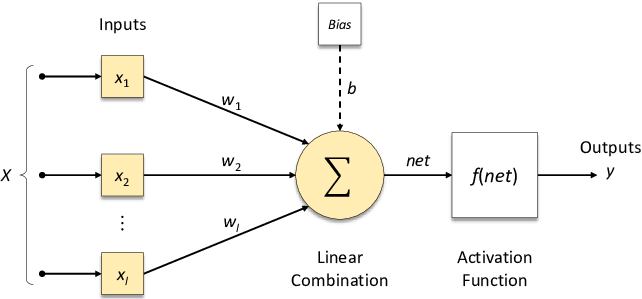

## A perceptron/ Neuron is a fundamental building block of neural networks , essentially acting as a simplified model of a biological neuron. It takes multiple inputs, each with an associated weight, sums them, and then applies an activation function to produce an output.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
x = data.data

In [ ]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:

scaler = StandardScaler()
scaler


StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
x_train, x_test, y_train, y_test

(array([[-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
         -1.44707648e+00],
        [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
          9.22302838e-01],
        [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
          5.27406285e-01],
        [ 1.03800476e+00,  9.82172869e-02,  5.35408562e-01,
          3.95774101e-01],
        [-5.37177559e-01,  1.93979142e+00, -1.39706395e+00,
         -1.05217993e+00],
        [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
         -1.31544430e+00],
        [-4.16009689e-01, -1.51316008e+00, -3.29657076e-02,
         -2.62386821e-01],
        [ 5.53333275e-01, -5.92373012e-01,  7.62758269e-01,
          3.95774101e-01],
        [ 6.74501145e-01,  9.82172869e-02,  9.90107977e-01,
          7.90670654e-01],
        [ 9.16836886e-01, -1.31979479e-01,  3.64896281e-01,
          2.64141916e-01],
        [ 1.64384411e+00,  1.24920112e+00, 

In [ ]:
n_features = x.shape[1]
n_features

4

Binary Perceptron

In [ ]:
class perceptron:
  def __init__(self,n_features, learning_rate=0.01, epochs=1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = np.zeros(n_features+1)   # +1 for bias term

  def predict(self, x):
    x_bias = np.insert(x, 0, 1, axis=1)    # add bias term
    linear_output = np.dot(x_bias, self.weights)
    return np.where(linear_output >= 0, 1, 0)

  def train(self, x, y):
    x_bias = np.insert(x, 0, 1, axis=1)
    for _ in range(self.epochs):
      for xi, target in zip(x_bias, y):
        output = np.dot(xi, self.weights)
        prediction = 1 if output >= 0 else 0
        error = target - prediction
        self.weights += self.learning_rate * error * xi

### Multiclass perceptron : Using One vs All
taking an example - if we need to direct someone to one of three different party rooms: "Room A," "Room B," or "Room C"? A single perceptron with a yes/no answer is no longer enough.

 so heare we use a layer of perceptrons, with one dedicated perceptron for each possible class.

*  Shared Input, Specialized Neurons: All perceptrons in the output layer receive the exact same input data. However, each one is a specialist.
We have a "Room A" perceptron, a "Room B" perceptron, and a "Room C" perceptron

*  Unique Weights: Each specialist perceptron has its own unique set of weights and its own bias.

The "Room A" perceptron will learn weights that get excited by features indicating someone belongs in Room A.

The "Room B" perceptron learns weights that look for "Room B" features, and so on.

*  Calculate Raw Scores (Logits): Each perceptron independently calculates its weighted sum

The Final Decision (Winner-Take-All): After calculating the three scores, the network needs to make a final decision. The simplest method is a "winner-take-all" approach: the class corresponding to the perceptron with the highest raw score is the chosen prediction.


### <center><b>The Modern Approach: From Scores to Probabilities : using Softmax activation function in output layer that gives output as probabilityc dist.</b></center>


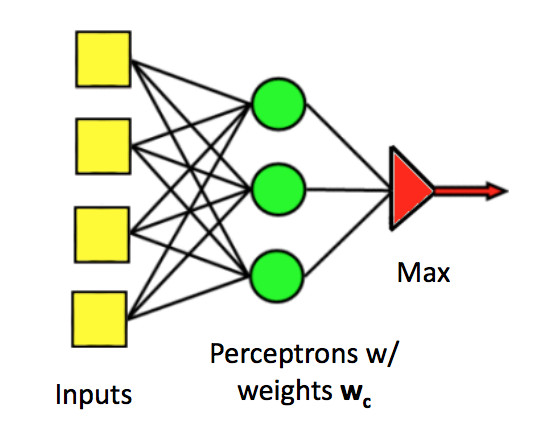

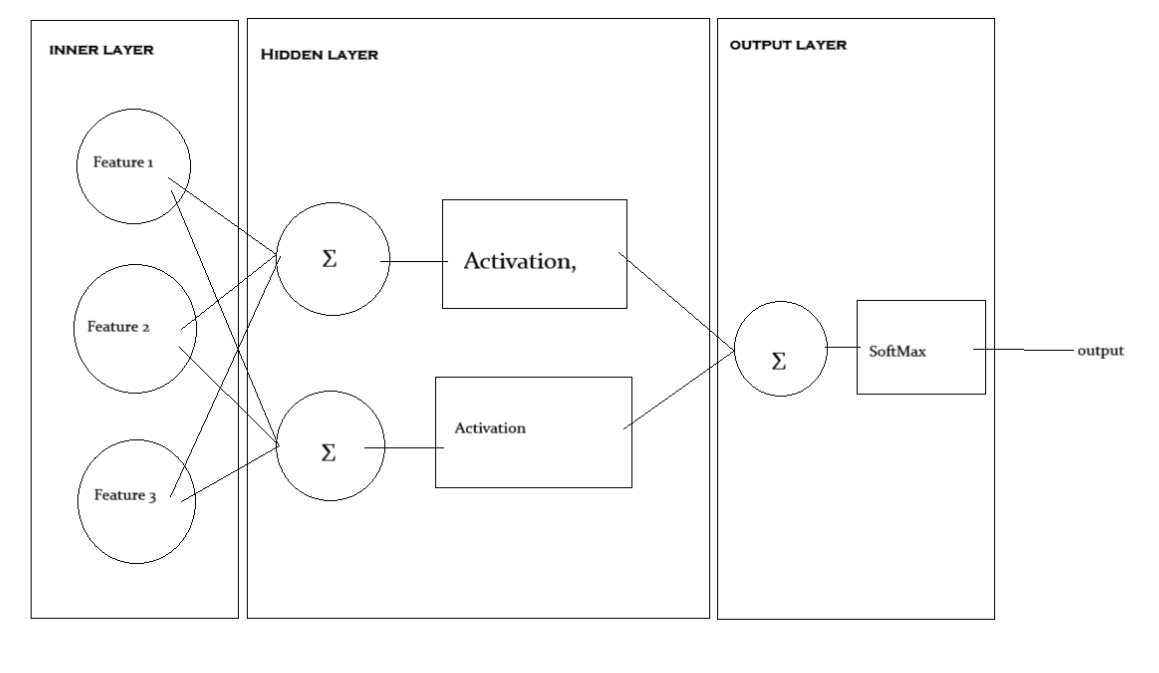

In [ ]:
# Step 5: Multiclass Perceptron using One-vs-All
class MulticlassPerceptron:
    def __init__(self, n_classes, n_features, lr=0.01, epochs=1000):
        self.models = [perceptron(n_features, lr, epochs) for _ in range(n_classes)]

    def train(self, X, y):
        for class_idx, model in enumerate(self.models):
            # Create binary labels for One-vs-All
            binary_y = np.where(y == class_idx, 1, 0)
            model.train(X, binary_y)

    def predict(self, X):
        outputs = np.array([model.predict(X) for model in self.models])
        return np.argmax(outputs, axis=0)

In [ ]:
# Step 6: Initialize, Train, Predict
n_classes = len(np.unique(y))
n_features =x.shape[1]

In [ ]:

clf = MulticlassPerceptron(n_classes=n_classes, n_features=n_features, lr=0.01, epochs=1000)
clf.train(x_train, y_train)

y_pred = clf.predict(x_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7894736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       0.75      0.55      0.63        11
           2       1.00      0.75      0.86        12

    accuracy                           0.79        38
   macro avg       0.82      0.77      0.77        38
weighted avg       0.81      0.79      0.78        38



Common layer wise usage-
 <table>
<tr><th>Layer type</th><th>Commmon Activation func</th></tr>
<tr><th>Inner</th><th>Usually none</th></tr>
<tr><th>Hidden layer</th><th>ReLu, Leaky ReLU, </th></tr>
<tr><th>Output Layer </th><th>Sigmoid, SoftMax</th></tr>
 </table>